#Tipos de fronteras en clasificación

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

def do_gaussianXOR(n1=250,n2=250):
    rng = np.random.RandomState(0)
    u = 0.5
    std = 0.3 #el ruido se agrega aca
    primer_c = rng.normal(loc=[u,u],scale=std,size=(n1,2))
    segundo_c = rng.normal(loc=[-u,u],scale=std,size=(n2,2))
    tercer_c = rng.normal(loc=[-u,-u],scale=std,size=(n1,2))
    cuarto_c = rng.normal(loc=[u,-u],scale=std,size=(n2,2))
    X_train = np.vstack((primer_c,segundo_c,tercer_c,cuarto_c))
    Y_train = np.hstack((np.zeros(n1),np.ones(n2),np.zeros(n1),np.ones(n2)))   
    X_test = rng.uniform(low=-1.0,high=1.0,size=( (n1+n2),2))
    Y_test = np.logical_xor(X_test[:,0] > 0, X_test[:,1] > 0)
    return X_train,Y_train,X_test,Y_test

> **a) Construya el conjunto de datos (*dataset*) y describa el proceso de creación de éstos. Determine cuántos registros contiene cada conjunto y visualı́celos.**

Se define un randomizador que agregara puntos en el plano cartesiano para los cuatro cuadrantes siguiendo una distribución normal con medias entre [-0.5, 0.5] dependiendo del cuadrante en el cual se agregue, además se establece una desviación estandar de 0.3, se distribuyen los puntos en el set de entrenamiento y se establecen a que clase corresponde cada uno en el set y_train, luego se genera un espacio de testing.

In [2]:
X_train,Y_train,X_test,Y_test = do_gaussianXOR()

In [3]:
print("Dimensiones conjunto de entrenamiento: "+ str(X_train.shape))
print("Dimensiones conjunto de pruebas: "+ str(X_test.shape))

Dimensiones conjunto de entrenamiento: (1000, 2)
Dimensiones conjunto de pruebas: (500, 2)


El conjunto de entrenamiento cuenta con 1000 ejemplos bi-dimensionales. El conjunto de pruebas contiene 500 ejemplos.

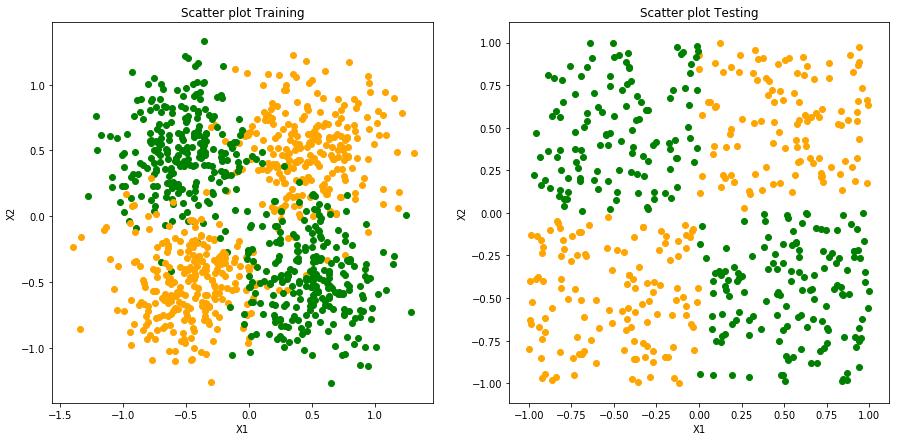

In [4]:
plt.figure(figsize=(15,7))
plt.subplot(121)
plt.title("Scatter plot Training")
plt.xlabel("X1")
plt.ylabel("X2")
for i in range(len(X_train)):
  if Y_train[i] == 0:
    plt.scatter(X_train[i,0],X_train[i,1], c="orange")
  else:
    plt.scatter(X_train[i,0],X_train[i,1], c="green")
plt.subplot(122)
plt.title("Scatter plot Testing")
plt.xlabel("X1")
plt.ylabel("X2")
for i in range(len(X_test)):
  if Y_test[i] == 0:
    plt.scatter(X_test[i,0],X_test[i,1], c="orange")
  else:
    plt.scatter(X_test[i,0],X_test[i,1], c="green")
plt.show()

<font size="5">ACÁ DESCRIPCIÓN DEL GRÁFICO c:</font>

In [5]:
import matplotlib.pyplot as plt
def visualize_border(model,x,y,title=""):
    fig, axis = plt.subplots(1, 1,figsize=(12, 6))

    plt.scatter(x[:,0], x[:,1], s=50, c=y, cmap=plt.cm.winter)
    h = .02 # step size in the mesh
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) #or predict_proba
    Z = Z.reshape(xx.shape)
    Zplot = Z > 0.5

    axis.scatter(x[:,0],x[:,1],s=50,c=y,zorder=10,cmap=plt.cm.winter)
    axis.contour(xx, yy, Z,levels=[-1, 0, 1])
    axis.pcolormesh(xx, yy, Zplot ,cmap=plt.cm.YlGn)
    plt.title(title)
    plt.show()

> **b) Entrene el clasificador Linear Discriminant Analysis (LDA) y visualice la frontera de decisión que define este algoritmo. Comente cualitativamente lo que observa.**

In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

def do_LDA(X, Y):
  model = LDA()
  model.fit(X, Y)
  return model

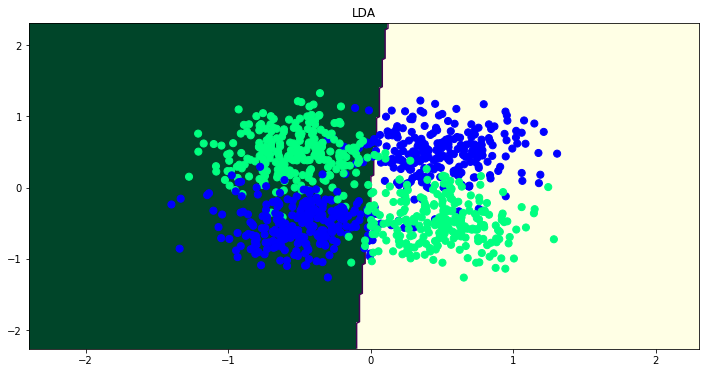

In [7]:
lda = do_LDA(X_train, Y_train)
visualize_border(lda, X_train, Y_train, "LDA")

# COMPLETAR MÁS
Debería tener el mismo comportamiento que un clasificador que elija de manera aleatoria que clase asignar, debido a que se observa que la frontera obtenida clasificará mal aproximadamente el 50% de los datos.

> **c) Entrene el clasificador Quadratic Discriminant Analysis (QDA) y visualice la frontera de decisión que define este algoritmo. Analice cualitativamente lo que observa y compare con LDA, en qué difieren y en qué se asemejan ¿Qué distribución de probabilidad asumen cada uno?**

In [8]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

def do_QDA(X, Y):
  model = QDA()
  model.fit(X, Y)
  return model

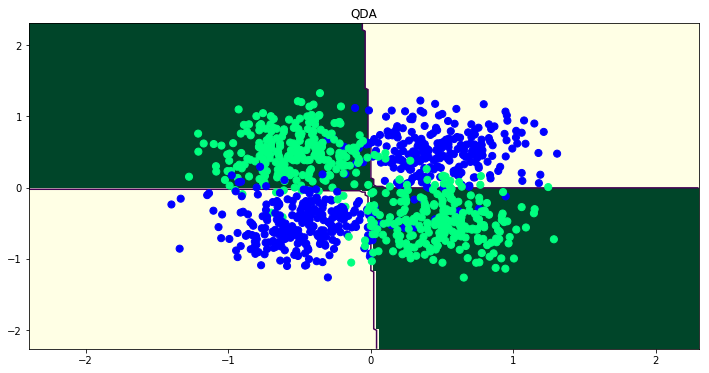

In [9]:
qda = do_QDA(X_train, Y_train)
visualize_border(qda, X_train, Y_train, "QDA")

> **d) Demuestre experimentalmente que una Máquina de Vectores de Soporte (SVM) Lineal no puede resolver el problema, para esto construyala a través de sklearn. Mediante la widget interactiva explore diferentes valores del parámetro de regularización  $C$. Analice cualitativamente lo observado, para validar su análisis cualitativo calcule el accuracy sobre el conjunto de pruebas. **

Param C=  0.1
Test Accuracy:  0.486


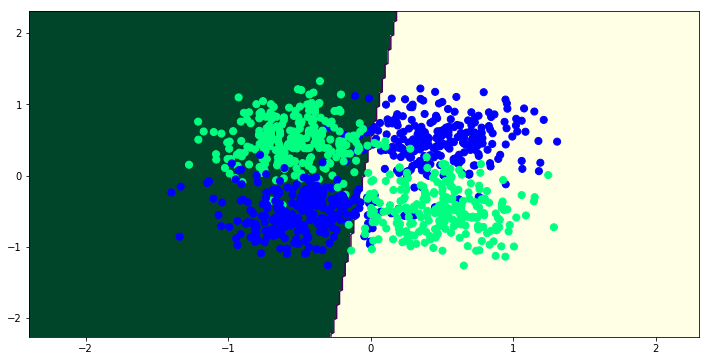

In [10]:
from sklearn.svm import SVC as SVM #SVC is for classification
def train_model(param, kernel='linear', degree=3):
    model= SVM()
    C = 10**(param)
    print("Param C= ",C)
    model.set_params(C=C,kernel=kernel, degree=degree)
    model.fit(X_train,Y_train)
    print("Test Accuracy: ",model.score(X_test,Y_test))
    return model
  
from ipywidgets import interactive

def visualize_border_interactive(param):
    model = train_model(param)
    visualize_border(model,X_train,Y_train) #here choose train/test or both!
    
p_min = -6 #define your range
p_max = 4 #define your range
interactive(visualize_border_interactive,param=(p_min,p_max))

Param C=  0.1
Test Accuracy:  0.486


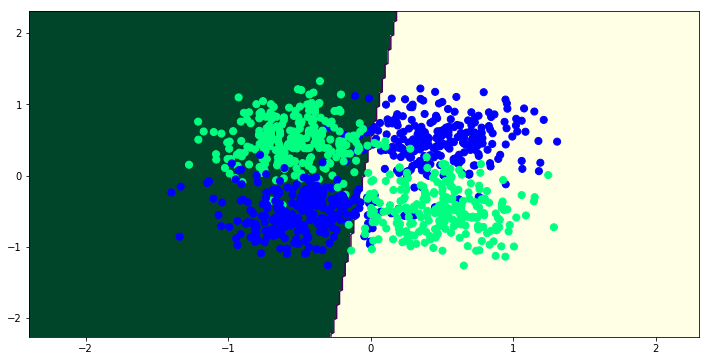

In [11]:
p_min = -6 #define your range
p_max = 4 #define your range
def visualize_border_kernel(param, kernel='linear', degree=3):
    model = train_model(param, kernel, degree)
    visualize_border(model,X_train,Y_train)
    
interactive(visualize_border_kernel,param=(p_min,p_max))

Depth=  20
Test Accuracy:  0.928


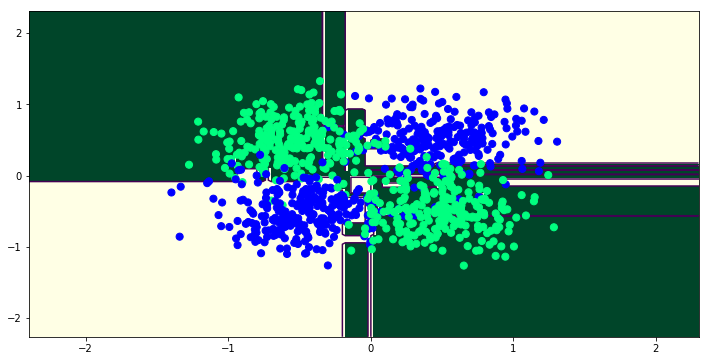

In [12]:
from sklearn.tree import DecisionTreeClassifier as Tree

def train_model_tree(param):
    model = Tree()
    print("Depth= ",param)
    model.set_params(max_depth=param,criterion='gini',splitter='best')
    model.fit(X_train,Y_train)
    print("Test Accuracy: ",model.score(X_test,Y_test))
    return model

def visualize_border_interactive_tree(param):
    model = train_model_tree(param)
    visualize_border(model,X_train,Y_train) #here choose train/test or both!

p_min = 1 #define your range
p_max = 40 #define your range
interactive(visualize_border_interactive_tree,param=(p_min,p_max))

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

def train_model(param):
    n_h=2**(param)
    print("Neuron hidden = ",n_h)
    model = Sequential()
    model.add(Dense(n_h, input_dim=X_train.shape[1], activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(optimizer=SGD(lr=0.1), loss="binary_crossentropy", metrics=["accuracy"])
    model.fit(X_train, Y_train, epochs=25, batch_size=128, verbose=0)
    print("Test Accuracy: ",model.evaluate(X_test, Y_test,batch_size=128,verbose=0)[1])
    return model

p_min = 0 #define your range
p_max = 10 #define your range
interactive(visualize_border_interactive,param=(p_min,p_max))

Using TensorFlow backend.


ImportError: DLL load failed: No se encontró el proceso especificado.